## Team id: 5D14
###  sem -5th sem
###  division -D
###  topic id - 5DMACP12
###  project title - Predict brain deep sleep slow oscillation
###  dataset - sleep 



### team members
    1.shreedevi olekar  01fe17bcs193
    2.siri kini         01fe17bcs204
    3.soujanya reddy    01fe17bcs209
    4.soujanya H        01fe17bcs210
   


### importing the required libraries :

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

C:\Users\shridevi\E\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\shridevi\E\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


### loading the data:

In [7]:
X_train = h5py.File("X_train_KBHhQ0d.h5", "r")

In [8]:
Y_train = pd.read_csv("y_train_2.csv").as_matrix()[:, 1].squeeze()

C:\Users\shridevi\E\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
X_test = h5py.File("X_test_eFVIB85.h5","r")

In [10]:
y_lol = pd.read_csv("y_lol_2.csv").as_matrix()[:, 1].squeeze()

C:\Users\shridevi\E\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
y=Y_train

### Feature extraction

In [12]:
def extract_features(h5):
    data = h5["features"][:]
    features = []
    features.append(data[:, :11])
    features.append(data[:, 11:].max(1).reshape(-1, 1))
    features.append(data[:, 11:].min(1).reshape(-1, 1))
    features.append(np.abs(data[:, 11:]).mean(1).reshape(-1, 1))
    features = np.concatenate(features, 1)
    return features

In [13]:
features_train = extract_features(X_train)

In [14]:
features_test = extract_features(X_test)

 #### shape of dataset
  

In [130]:
df.shape[0]

261634

In [131]:
df.shape[1]

14

In [132]:
df1.shape[0]

238366

In [133]:
df1.shape[1]

14

In [18]:
# convert into data frame
# df=x_train dataframe

df = pd.DataFrame(data=features_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,237.0,152.658761,341.523207,128.017491,429.0,3.0,11379.0,2730.0,3780.0,0.0,480.0,211.599465,-258.301643,81.013305
1,176.0,146.883435,338.039773,119.130849,196.0,2.0,6721.0,2580.0,2100.0,0.0,480.0,70.103670,-97.923331,21.165725
2,456.0,152.376541,335.629386,164.292580,417.0,2.0,26832.0,3240.0,7440.0,2130.0,750.0,117.154570,-121.882075,41.784518
3,21.0,139.720772,336.285714,159.237082,407.0,3.0,1289.0,0.0,60.0,0.0,450.0,92.368167,-110.453401,30.844542
4,72.0,140.649432,349.875000,130.184278,297.0,3.0,2262.0,630.0,960.0,0.0,450.0,105.522241,-119.812297,36.694904
5,164.0,144.847843,337.237805,252.473489,394.0,2.0,6381.0,2580.0,1740.0,0.0,480.0,102.158046,-178.019632,24.614113
6,260.0,152.699259,338.865385,215.023977,331.0,2.0,13614.0,2730.0,4470.0,0.0,480.0,109.299986,-140.245589,24.073877
7,113.0,143.275214,346.601770,122.776337,297.0,3.0,3058.0,1860.0,960.0,0.0,450.0,94.177991,-94.417635,28.225479
8,159.0,144.166783,337.245283,131.431768,314.0,2.0,6216.0,2580.0,1590.0,0.0,480.0,77.410336,-87.476120,28.881666
9,31.0,139.709626,345.967742,126.789608,420.0,3.0,1511.0,0.0,360.0,0.0,450.0,89.918533,-101.460761,29.488435


In [61]:
# adding attribute names using list
list_columns=['nof_pso','ma_pso','md_pso','amp_cso','dur_cso','cur_slp_stg','te_pfa','ts_dsf','ts_lsf','ts_rsf','ts_wsf','max_eeg','min_eeg','EEG_SIG']
d2=pd.DataFrame(data=features_train, columns=list_columns)
d2

,nof_pso,ma_pso,md_pso,amp_cso,dur_cso,cur_slp_stg,te_pfa,ts_dsf,ts_lsf,ts_rsf,ts_wsf,max_eeg,min_eeg,EEG_SIG
0,237.0,152.658761,341.523207,128.017491,429.0,3.0,11379.0,2730.0,3780.0,0.0,480.0,211.599465,-258.301643,81.013305
1,176.0,146.883435,338.039773,119.130849,196.0,2.0,6721.0,2580.0,2100.0,0.0,480.0,70.103670,-97.923331,21.165725
2,456.0,152.376541,335.629386,164.292580,417.0,2.0,26832.0,3240.0,7440.0,2130.0,750.0,117.154570,-121.882075,41.784518
3,21.0,139.720772,336.285714,159.237082,407.0,3.0,1289.0,0.0,60.0,0.0,450.0,92.368167,-110.453401,30.844542
4,72.0,140.649432,349.875000,130.184278,297.0,3.0,2262.0,630.0,960.0,0.0,450.0,105.522241,-119.812297,36.694904
5,164.0,144.847843,337.237805,252.473489,394.0,2.0,6381.0,2580.0,1740.0,0.0,480.0,102.158046,-178.019632,24.614113
6,260.0,152.699259,338.865385,215.023977,331.0,2.0,13614.0,2730.0,4470.0,0.0,480.0,109.299986,-140.245589,24.073877
7,113.0,143.275214,346.601770,122.776337,297.0,3.0,3058.0,1860.0,960.0,0.0,450.0,94.177991,-94.417635,28.225479
8,159.0,144.166783,337.245283,131.431768,314.0,2.0,6216.0,2580.0,1590.0,0.0,480.0,77.410336,-87.476120,28.881666
9,31.0,139.709626,345.967742,126.789608,420.0,3.0,1511.0,0.0,360.0,0.0,450.0,89.918533,-101.460761,29.488435


In [19]:
# df1=x_test
df1 = pd.DataFrame(data=features_test)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,213.0,145.954058,227.901408,137.092758,184.0,3.0,2742.0,2940.0,2670.0,120.0,630.0,108.970733,-144.628080,36.520870
1,166.0,144.122566,225.313253,131.541901,370.0,3.0,2417.0,2370.0,1980.0,120.0,480.0,77.009725,-86.946464,22.428556
2,423.0,149.903158,249.645390,311.165811,326.0,2.0,12072.0,4080.0,7110.0,120.0,1350.0,167.339471,-201.032992,38.798447
3,113.0,142.651369,227.654867,200.032274,257.0,3.0,2082.0,1950.0,930.0,0.0,480.0,110.578130,-112.672904,24.323178
4,158.0,143.938660,225.088608,157.963681,179.0,3.0,2374.0,2370.0,1740.0,120.0,480.0,104.607599,-112.347728,33.089795
5,264.0,148.454561,228.886364,185.413222,238.0,3.0,3112.0,3600.0,3480.0,120.0,690.0,110.751625,-123.261526,31.796693
6,38.0,139.076572,212.078947,151.009718,142.0,3.0,783.0,480.0,390.0,0.0,240.0,87.444668,-106.364855,26.938259
7,217.0,146.538634,228.557604,126.077913,278.0,3.0,2778.0,2940.0,2790.0,120.0,630.0,112.639707,-99.755459,28.557698
8,125.0,143.390489,225.744000,108.046555,185.0,3.0,2161.0,2310.0,930.0,0.0,480.0,80.571568,-97.450480,25.815792
9,425.0,150.332392,249.877647,118.244275,208.0,2.0,12300.0,4080.0,7170.0,120.0,1350.0,119.002134,-90.269700,38.901954


## Data Cleaning 

In [12]:
# checking the missing values if present
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',inplace=True)
percent_missing = df.isnull().sum() * 100 / len(df)
df.isnull().mean() * 100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
dtype: float64

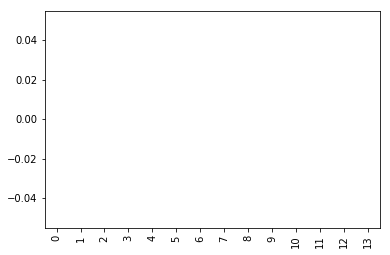

In [13]:
#summary of null value for each column 
no_null=df.isnull().sum()
no_null.plot(kind='bar',color='red')
plt.title=('Number of null values in % VS Columns')
plt.xlabel=('columns')
plt.ylabel=('Number of null values in %')
plt.show()

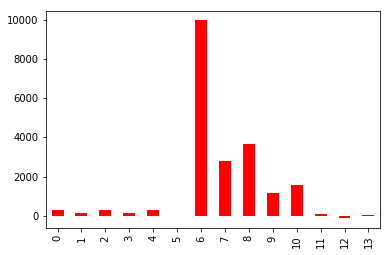

In [17]:
#mean of each attributes 
meann=df.mean()
meann.plot(kind='bar',color='red')
plt.title=('columns VS mean')
plt.xlabel=('columnn')
plt.ylabel=('mmean')
plt.show()

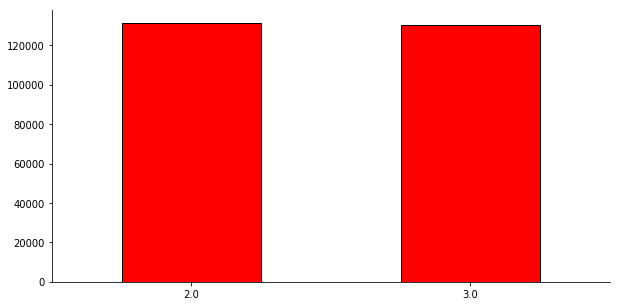

In [22]:
rcParams['figure.figsize']=10,5
df[5].value_counts(dropna=False).plot(kind='bar',color='red',rot=0,edgecolor='black')
plt.xlabel=('current_sleep_stage ')

sns.despine()

 131367 samples have current sleep stage as 2 and the remaining 130267 samples have 3

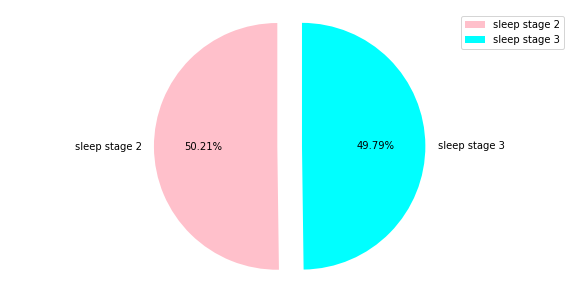

In [23]:
labels=['sleep stage 2','sleep stage 3']
colors=['pink','aqua']
sizes=df[5].value_counts().values
explode=(0.1,0.1)
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=False,explode=explode,autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

50.21% of the samples are in light sleep and 49.79% of the samples in deep sleep

The prediction is a label in {0, 1, 2}
where 0 represents 'no slow oscillation is starting in the following second' ,1 represents 'a slow oscillation of low amplitude started in the following second'
and 2 representsn 'a slow oscillation of high amplitude started in the following second'.

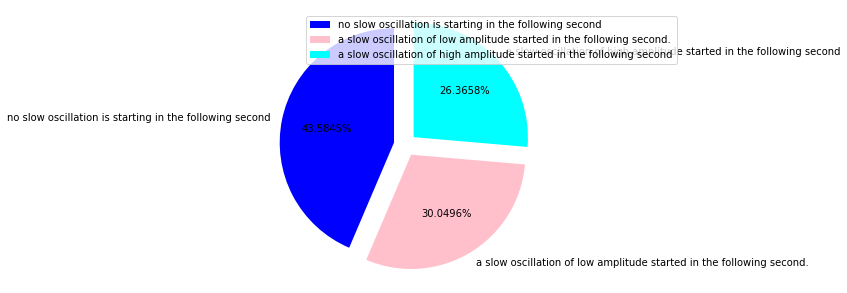

In [25]:
labels=['no slow oscillation is starting in the following second','a slow oscillation of low amplitude started in the following second.','a slow oscillation of high amplitude started in the following second']
colors=['blue','pink','aqua']
sizes=y_train['label'].value_counts().values
explode=(0.1,0.1,0.1)
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=False,explode=explode,autopct='%1.4f%%')
plt.axis('equal')
plt.legend()
plt.show()

## random forest before processing

* A random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the prediction 

In [127]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=500, random_state=0,bootstrap=True)
clf.fit(df, y)
y_pred = clf.predict(df1)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_lol,y_pred))
print(classification_report(y_lol,y_pred))
print(accuracy_score(y_lol, y_pred))

[[47825 18119 13597]
 [47857 17611 13474]
 [48154 18125 13604]]
             precision    recall  f1-score   support

          0       0.33      0.60      0.43     79541
          1       0.33      0.22      0.27     78942
          2       0.33      0.17      0.23     79883

avg / total       0.33      0.33      0.31    238366

0.3315909148116762


In [16]:
with open("y_benchmarkfinal.csv", "w") as f:S
    f.write("".join(["id,label\n"] + ["{},{}\n".format(i, y) for i, y in enumerate(y_pred)]))

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import warnings

warnings.simplefilter('ignore')

### Function for learning curve

In [137]:
def fun1(model,x,y):
  train_sizes, train_scores, test_scores = learning_curve(
          model, x, y, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5))

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  trace1 = {
    "name": "Training Scores", 
    "type": "scatter", 
    "x": train_sizes, 
    "y": train_scores_mean
  }
  trace2 = {
    "name": "Test Scores", 
    "type": "scatter", 
    "x": train_sizes, 
    "y": test_scores_mean
  }

  #data = go.Data([trace1, trace2])
  layout = {
    "title": "Learning Curve of Linear Regression", 
    "width": 600, 
    "xaxis": {
      "title": "Training Size", 
      "titlefont": {
        "size": 18, 
        "color": "black", 
        "family": "Courier New, monospace"
      }
    }, 
    "yaxis": {
      "title": "Scores", 
      "titlefont": {
        "size": 18, 
        "color": "black", 
        "family": "Courier New, monospace"
      }
    }, 
    "height": 1000, 
    "width" : 1000,
    "autosize": False, 
    "showlegend": True
  }
  #fig = go.Figure(data=data, layout=layout )
  #fig.show()
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

  plt.legend(loc="best")
  plt.show()

# Normalization

* it reduces the redundancy of data in the database.It optimally designs a data base to reduce the dedundant data.

In [15]:
from sklearn import preprocessing

In [20]:
df_input = preprocessing.normalize(df)

In [21]:
df_test=preprocessing.normalize(df1)

In [22]:
df_input=pd.DataFrame(df_input)

In [23]:
df_test=pd.DataFrame(df_test)

In [20]:
df_input.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000
mean,0.027351,0.030445,0.055703,0.031164,0.056317,0.000499,0.807073,0.253177,0.284167,0.077257,0.178163,0.020488,-0.023190,0.005386
std,0.014047,0.042580,0.075835,0.044037,0.076787,0.000655,0.165762,0.216739,0.185252,0.097403,0.142732,0.028690,0.032620,0.007152
min,0.000000,0.002551,0.005496,0.002183,0.002850,0.000039,0.001035,0.000000,0.000000,0.000000,0.000000,0.001078,-0.921741,0.000260
25%,0.016270,0.009321,0.017262,0.009241,0.017247,0.000126,0.719540,0.063108,0.138188,0.000000,0.080506,0.005921,-0.025444,0.001422
50%,0.026710,0.015715,0.028982,0.015899,0.029671,0.000251,0.852829,0.219333,0.278028,0.035378,0.133956,0.010602,-0.011854,0.002808
75%,0.037885,0.032389,0.059136,0.033497,0.060224,0.000561,0.938681,0.389480,0.417970,0.131940,0.228121,0.022595,-0.006607,0.006225
max,0.129375,0.736093,0.827564,0.630129,0.828601,0.007441,0.999815,0.960470,0.888519,0.674154,0.960217,0.569537,-0.001415,0.116954


In [21]:
df_input.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.019225,0.012384,0.027704,0.010385,0.034800,0.000243,0.923056,0.221456,0.306631,0.000000,0.038937,0.017165,-0.020953,0.006572
1,0.023373,0.019506,0.044892,0.015821,0.026029,0.000266,0.892546,0.342623,0.278879,0.000000,0.063744,0.009310,-0.013004,0.002811
2,0.016209,0.005416,0.011930,0.005840,0.014822,0.000071,0.953746,0.115166,0.264455,0.075711,0.026659,0.004164,-0.004332,0.001485
3,0.014115,0.093915,0.226038,0.107033,0.273569,0.002016,0.866415,0.000000,0.040330,0.000000,0.302472,0.062086,-0.074242,0.020732
4,0.027376,0.053478,0.133031,0.049499,0.112927,0.001141,0.860068,0.239542,0.365016,0.000000,0.171101,0.040122,-0.045556,0.013952
5,0.022952,0.020272,0.047197,0.035334,0.055141,0.000280,0.893038,0.361078,0.243518,0.000000,0.067177,0.014297,-0.024914,0.003445
6,0.017798,0.010453,0.023197,0.014719,0.022659,0.000137,0.931944,0.186882,0.305993,0.000000,0.032858,0.007482,-0.009600,0.001648
7,0.029976,0.038007,0.091945,0.032570,0.078787,0.000796,0.811213,0.493413,0.254665,0.000000,0.119374,0.024983,-0.025047,0.007488
8,0.022868,0.020735,0.048504,0.018903,0.045161,0.000288,0.894007,0.371065,0.228679,0.000000,0.069035,0.011133,-0.012581,0.004154
9,0.017997,0.081107,0.200848,0.073606,0.243827,0.001742,0.877195,0.000000,0.208994,0.000000,0.261243,0.052201,-0.058902,0.017119


In [22]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,213.0,145.954058,227.901408,137.092758,184.0,3.0,2742.0,2940.0,2670.0,120.0,630.0,108.970733,-144.628080,36.520870
1,166.0,144.122566,225.313253,131.541901,370.0,3.0,2417.0,2370.0,1980.0,120.0,480.0,77.009725,-86.946464,22.428556
2,423.0,149.903158,249.645390,311.165811,326.0,2.0,12072.0,4080.0,7110.0,120.0,1350.0,167.339471,-201.032992,38.798447
3,113.0,142.651369,227.654867,200.032274,257.0,3.0,2082.0,1950.0,930.0,0.0,480.0,110.578130,-112.672904,24.323178
4,158.0,143.938660,225.088608,157.963681,179.0,3.0,2374.0,2370.0,1740.0,120.0,480.0,104.607599,-112.347728,33.089795
5,264.0,148.454561,228.886364,185.413222,238.0,3.0,3112.0,3600.0,3480.0,120.0,690.0,110.751625,-123.261526,31.796693
6,38.0,139.076572,212.078947,151.009718,142.0,3.0,783.0,480.0,390.0,0.0,240.0,87.444668,-106.364855,26.938259
7,217.0,146.538634,228.557604,126.077913,278.0,3.0,2778.0,2940.0,2790.0,120.0,630.0,112.639707,-99.755459,28.557698
8,125.0,143.390489,225.744000,108.046555,185.0,3.0,2161.0,2310.0,930.0,0.0,480.0,80.571568,-97.450480,25.815792
9,425.0,150.332392,249.877647,118.244275,208.0,2.0,12300.0,4080.0,7170.0,120.0,1350.0,119.002134,-90.269700,38.901954


# FEATURE EXTRACTION 
selecting a particular feature from huge collection of features. 

In [141]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(df, y)

In [19]:
sel.get_support()

array([False,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True])

In [20]:
finalDf1 = df.iloc[:,1:5]
finalDf2 = df.iloc[:,6]
finalDf3 = df.iloc[:,11:14]

finalDf11 = df1.iloc[:,1:5]
finalDf12 = df1.iloc[:,6]
finalDf13 = df1.iloc[:,11:14]

In [21]:
# Important features only
df= pd.concat([finalDf1, finalDf2, finalDf3], axis=1, sort=False)
df1 = pd.concat([finalDf11, finalDf12, finalDf13], axis=1, sort=False)

In [22]:
df

,1,2,3,4,6,11,12,13
0,0.130201,0.596709,0.070165,0.824121,0.227206,0.086012,0.960213,0.368491
1,0.115673,0.587731,0.047860,0.238693,0.134191,0.016583,0.990684,0.066118
2,0.129491,0.581519,0.161216,0.793970,0.535784,0.039670,0.986132,0.170292
3,0.097656,0.583211,0.148526,0.768844,0.025720,0.027508,0.988304,0.115019
4,0.099992,0.618235,0.075604,0.492462,0.045150,0.033962,0.986526,0.144578
5,0.110553,0.585664,0.382549,0.736181,0.127401,0.032311,0.975466,0.083541
6,0.130303,0.589859,0.288551,0.577889,0.271836,0.035816,0.982643,0.080811
7,0.106597,0.609798,0.057010,0.492462,0.061045,0.028396,0.991350,0.101787
8,0.108840,0.585684,0.078735,0.535176,0.124106,0.020168,0.992669,0.105102
9,0.097628,0.608164,0.067083,0.801508,0.030153,0.026306,0.990012,0.108168


# Decision tree

Decision trees are a non-parametric supervised learning method used for classification.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
sel = SelectFromModel(DecisionTreeClassifier())
sel.fit(df, y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        norm_order=1, prefit=False, threshold=None)

In [143]:
sel.get_support()

array([False,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True])

In [144]:
finalDf1 = df.iloc[:,1:5]
finalDf2 = df.iloc[:,6]
finalDf3 = df.iloc[:,11:14]

finalDf11 = df1.iloc[:,1:5]
finalDf12 = df1.iloc[:,6]
finalDf13 = df1.iloc[:,11:14]

In [145]:
df= pd.concat([finalDf1, finalDf2, finalDf3], axis=1, sort=False)
df1 = pd.concat([finalDf11, finalDf12, finalDf13], axis=1, sort=False)

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(df,y)
#Predict the response for test dataset
y_pred = clf.predict(df1)

In [27]:
print(accuracy_score(y_lol, y_pred))

0.3336675532584345


# Decision Tree with GridSearchCV

In [152]:
from sklearn import grid_search

In [148]:
## Decision Tree with GridSearchCV
from sklearn import tree, grid_search
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 3, 5, 10,11,16,45,75,90,100,120,150]}
dt = tree.DecisionTreeClassifier()
clf = grid_search.GridSearchCV(dt, parameters)

clf.fit(df_input, y)
prediction = clf.predict(df_test)

## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction, y_lol))

0.3318845808546521


# Random forest after preprocessing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(df_input, y, test_size=0.3, random_state=42)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics, svm
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn import preprocessing

In [30]:
def show_time(diff):
   m, s = divmod(diff, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [29]:
prediction_times = []
training_times = []
scores = []

In [28]:
import time

# Takes in a classifier, calculates the training + prediction times and accuracy score, returns a model
def Train(clf, X, y, X_predict, y_predict, type='classification'):
    # Train
    start = time.time()
    model = clf.fit(X,y)
    end = time.time()
    print('Training time: ')
    show_time(end - start)
    training_times.append(end - start)

    # Predict
    start = time.time()
    if(type=='classification'):
        print('\nAccuracy: ', accuracy_score(y_predict, model.predict(X_predict)))
        scores.append(accuracy_score(y_predict, model.predict(X_predict)))
    else:
        print(rmse(y_test, model.predict(X_test)))
        scores.append(rmse(y_test, model.predict(X_test)))
    end = time.time()
    prediction_times.append(end - start)
    print('\nPrediction time: ')
    show_time(end - start)
    return model

In [34]:
randm = Train(RandomForestClassifier(n_estimators=100, random_state=42), df_input, y,  X_test, y_test)

Training time: 
Execution Time: 00:04:23

Accuracy:  1.0

Prediction time: 
Execution Time: 00:00:14


## light gradient boosting machine(LGBM)

In [114]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(df_input, y, test_size=0.3, random_state=42)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics, svm
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn import preprocessing

In [120]:
def show_time(diff):
   m, s = divmod(diff, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [121]:
prediction_times = []
training_times = []
scores = []

In [122]:
import time

# Takes in a classifier, calculates the training + prediction times and accuracy score, returns a model
def Train(clf, X, y, X_predict, y_predict, type='classification'):
    # Train
    start = time.time()
    model = clf.fit(X,y)
    end = time.time()
    print('Training time: ')
    show_time(end - start)
    training_times.append(end - start)

    # Predict
    start = time.time()
    if(type=='classification'):
        print('\nAccuracy: ', accuracy_score(y_predict, model.predict(X_predict)))
        scores.append(accuracy_score(y_predict, model.predict(X_predict)))
    else:
        print(rmse(y_test, model.predict(X_test)))
        scores.append(rmse(y_test, model.predict(X_test)))
    end = time.time()
    prediction_times.append(end - start)
    print('\nPrediction time: ')
    show_time(end - start)
    return model

In [159]:
lgb = Train(LGBMClassifier(n_estimators=500, subsample_for_bin=200,max_depth=-1,colsample_bytree=1,n_jobs=2,learning_rate=0.7,subsample=1.0,objective='multi:softprob'), df_input, y,  X_test, y_test)

Training time: 
Execution Time: 00:00:27

Accuracy:  0.7071256577187194

Prediction time: 
Execution Time: 00:00:13


In [124]:
y_pre=lgb.predict(df_test)

C:\Users\shridevi\E\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


MODEL SCORE IS : 
0.5464542070220232
MEAN ABSOLUTE ERROR IS : 
0.5956106622227998


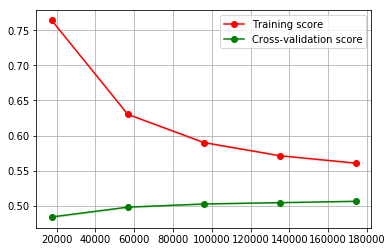

In [150]:
lgb.fit(df_input, y)
print("MODEL SCORE IS : ")
print(lgb.score(df_input, y))
ypred=lgb.predict(df_input) 
print("MEAN ABSOLUTE ERROR IS : ")
print(mean_absolute_error(y, ypred)) 
fun1(lgb,df_input,y)

In [125]:
with open("y_benchmarkjan.csv", "w") as f:
    f.write("".join(["id,label\n"] + ["{},{}\n".format(i, y) for i, y in enumerate(y_pre)]))

# Outliers

In [16]:
def outlier_detect(dfb):
    for i in dfb.describe().columns:
        Q1=dfb.describe().at['25%',i]
        Q3=dfb.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(dfb[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(dfb[i].median())
            else:
                p.append(j)
        dfb[i]=p
    return dfb

In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000
mean,318.747946,160.071336,295.196238,165.555680,303.401041,2.497902,9959.361623,2791.230918,3661.615960,1160.384965,1566.846243,109.901005,-122.571537,28.402944
std,278.220823,14.185969,30.406791,48.567345,81.122852,0.499997,7648.646253,2400.800086,3677.006442,1658.526721,1307.594080,40.590234,41.931206,11.094956
min,0.000000,100.899351,110.000000,100.063046,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.307474,-5312.117511,8.079177
25%,107.000000,150.345850,275.369486,130.277312,242.000000,2.000000,3334.000000,540.000000,870.000000,0.000000,720.000000,82.237280,-140.436586,20.614999
50%,244.000000,159.137152,293.415506,153.463605,293.000000,2.000000,8129.000000,2460.000000,2430.000000,390.000000,1200.000000,102.256878,-113.587426,26.243874
75%,453.000000,168.341291,314.000000,188.039183,358.000000,3.000000,14931.000000,4470.000000,5430.000000,1770.000000,2010.000000,128.665653,-94.578472,33.649052
max,2248.000000,498.433033,498.000000,498.470676,499.000000,3.000000,50079.000000,12810.000000,24360.000000,12180.000000,16140.000000,2074.312266,-48.893229,206.005612


In [17]:
outlier_detect(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,237.0,152.658761,341.523207,128.017491,429.0,3.0,11379.0,2730.0,3780.0,0.0,480.0,102.256878,-113.587426,26.243874
1,176.0,146.883435,338.039773,119.130849,196.0,2.0,6721.0,2580.0,2100.0,0.0,480.0,70.103670,-97.923331,21.165725
2,456.0,152.376541,335.629386,164.292580,417.0,2.0,26832.0,3240.0,7440.0,2130.0,750.0,117.154570,-121.882075,41.784518
3,21.0,139.720772,336.285714,159.237082,407.0,3.0,1289.0,0.0,60.0,0.0,450.0,92.368167,-110.453401,30.844542
4,72.0,140.649432,349.875000,130.184278,297.0,3.0,2262.0,630.0,960.0,0.0,450.0,105.522241,-119.812297,36.694904
5,164.0,144.847843,337.237805,252.473489,394.0,2.0,6381.0,2580.0,1740.0,0.0,480.0,102.158046,-178.019632,24.614113
6,260.0,152.699259,338.865385,215.023977,331.0,2.0,13614.0,2730.0,4470.0,0.0,480.0,109.299986,-140.245589,24.073877
7,113.0,143.275214,346.601770,122.776337,297.0,3.0,3058.0,1860.0,960.0,0.0,450.0,94.177991,-94.417635,28.225479
8,159.0,144.166783,337.245283,131.431768,314.0,2.0,6216.0,2580.0,1590.0,0.0,480.0,77.410336,-87.476120,28.881666
9,31.0,139.709626,345.967742,126.789608,420.0,3.0,1511.0,0.0,360.0,0.0,450.0,89.918533,-101.460761,29.488435


In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000,261634.000000
mean,287.987872,159.465032,294.130001,159.631548,303.401041,2.497902,9810.331792,2759.194944,3218.864559,825.719287,1335.437328,105.604088,-117.932639,27.171250
std,226.017973,12.496505,27.608798,38.086295,81.122852,0.499997,7413.806342,2344.431156,2996.768485,1101.242157,835.221946,31.169978,30.241223,8.735460
min,0.000000,123.373168,217.458194,100.063046,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.307474,-209.220203,8.079177
25%,107.000000,150.445932,275.602469,130.277312,242.000000,2.000000,3334.000000,540.000000,870.000000,0.000000,720.000000,82.237280,-135.937174,20.614999
50%,244.000000,159.137152,293.415506,153.463505,293.000000,2.000000,8129.000000,2460.000000,2430.000000,390.000000,1200.000000,102.256756,-113.587248,26.243849
75%,418.000000,167.713633,312.665830,181.395477,358.000000,3.000000,14748.000000,4440.000000,4800.000000,1320.000000,1770.000000,124.415497,-94.578472,32.396284
max,972.000000,195.332547,371.944444,274.681975,499.000000,3.000000,32325.000000,10350.000000,12270.000000,4410.000000,3930.000000,198.299658,-48.893229,53.196424


In [19]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000
mean,314.309503,159.745506,294.200244,165.685003,302.780548,2.498238,9770.298356,2730.656218,3661.454654,1184.962243,1604.332455,110.116105,-123.002446,28.472278
std,270.494628,14.576727,30.128736,49.485131,81.155182,0.499998,7617.992551,2278.451846,3742.543972,1781.661422,1606.284229,41.074832,40.620928,11.247767
min,0.000000,100.088169,102.000000,100.203331,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.841685,-960.055564,8.313021
25%,107.000000,149.919019,275.073674,129.897998,242.000000,2.000000,3187.000000,570.000000,810.000000,0.000000,690.000000,82.084993,-140.894956,20.621455
50%,243.000000,158.101062,292.814720,153.068689,292.000000,2.000000,7876.000000,2460.000000,2430.000000,390.000000,1170.000000,102.073061,-113.722277,26.271256
75%,448.000000,167.750579,312.084094,188.020169,357.000000,3.000000,14678.000000,4410.000000,5370.000000,1710.000000,1950.000000,128.924786,-94.716577,33.657882
max,1950.000000,473.873145,499.000000,499.297312,499.000000,3.000000,48506.000000,11280.000000,24600.000000,12480.000000,25320.000000,2269.808323,-57.072396,188.311005


In [20]:
outlier_detect(df1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,213.0,145.954058,227.901408,137.092758,184.0,3.0,2742.0,2940.0,2670.0,120.0,630.0,108.970733,-144.628080,36.520870
1,166.0,144.122566,225.313253,131.541901,370.0,3.0,2417.0,2370.0,1980.0,120.0,480.0,77.009725,-86.946464,22.428556
2,423.0,149.903158,249.645390,153.068689,326.0,2.0,12072.0,4080.0,7110.0,120.0,1350.0,167.339471,-201.032992,38.798447
3,113.0,142.651369,227.654867,200.032274,257.0,3.0,2082.0,1950.0,930.0,0.0,480.0,110.578130,-112.672904,24.323178
4,158.0,143.938660,225.088608,157.963681,179.0,3.0,2374.0,2370.0,1740.0,120.0,480.0,104.607599,-112.347728,33.089795
5,264.0,148.454561,228.886364,185.413222,238.0,3.0,3112.0,3600.0,3480.0,120.0,690.0,110.751625,-123.261526,31.796693
6,38.0,139.076572,292.814720,151.009718,142.0,3.0,783.0,480.0,390.0,0.0,240.0,87.444668,-106.364855,26.938259
7,217.0,146.538634,228.557604,126.077913,278.0,3.0,2778.0,2940.0,2790.0,120.0,630.0,112.639707,-99.755459,28.557698
8,125.0,143.390489,225.744000,108.046555,185.0,3.0,2161.0,2310.0,930.0,0.0,480.0,80.571568,-97.450480,25.815792
9,425.0,150.332392,249.877647,118.244275,208.0,2.0,12300.0,4080.0,7170.0,120.0,1350.0,119.002134,-90.269700,38.901954


In [21]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000,238366.000000
mean,285.202328,159.109636,293.094541,159.304430,302.780548,2.498238,9621.527185,2725.009523,3175.627355,775.976104,1287.057844,105.624733,-118.155283,27.154981
std,221.545874,12.834511,26.837907,38.171107,81.155182,0.499998,7384.527384,2268.851016,2981.949270,1057.896434,796.116140,31.447249,30.479045,8.739301
min,0.000000,123.197894,219.600000,100.203331,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.841685,-210.153320,8.313021
25%,107.000000,150.000784,275.467139,129.897998,242.000000,2.000000,3187.000000,570.000000,810.000000,0.000000,690.000000,82.084993,-136.074119,20.621455
50%,243.000000,158.101062,292.814720,153.068325,292.000000,2.000000,7876.000000,2460.000000,2430.000000,390.000000,1170.000000,102.073003,-113.722266,26.271254
75%,415.000000,167.029472,310.488247,180.874594,357.000000,3.000000,14505.000000,4410.000000,4710.000000,1200.000000,1680.000000,124.524616,-94.716577,32.333551
max,959.000000,194.497383,367.594059,275.203011,499.000000,3.000000,31914.000000,10140.000000,12210.000000,4260.000000,3840.000000,199.181212,-57.072396,53.211877


In [103]:
df_input = preprocessing.normalize(df)

In [104]:
df_test=preprocessing.normalize(df1)

In [105]:
df_test=pd.DataFrame(df_test)

In [106]:
df_input=pd.DataFrame(df_input)

In [168]:
df_sample=df_input.tail(180000)


In [169]:
df_y=pd.DataFrame(y)

In [170]:
df_yy=df_y.tail(180000)

### LGBMClassifier with  GridSearchCV

In [75]:
params = { 'application': 'binary', # for binary classification

'boosting': 'gbdt', # traditional gradient boosting decision tree
'num_iterations': 100, 
'learning_rate': 0.05,
'num_leaves': 62,
'device': 'cpu',
'max_depth': -1, # <0 means no limit
'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
'lambda_l1': 5, # L1 regularization
'lambda_l2': 10, # L2 regularization
'metric' : 'binary_error',
'subsample_for_bin': 200, # number of samples for constructing bins
'subsample': 1, # subsample ratio of the training instance
'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
'min_child_samples': 5# minimum number of data needed in a leaf
}

mdl = LGBMClassifier(boosting_type= 'gbdt', objective = 'binary', n_jobs = 5, silent = True, max_depth = params['max_depth'], max_bin = params['max_bin'], subsample_for_bin = params['subsample_for_bin'], subsample = params['subsample'], min_split_gain = params['min_split_gain'], min_child_weight = params['min_child_weight'], min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [38]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid =grid_search.GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1)
# Run the grid
grid.fit(df_input, y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 3456 candidates, totalling 13824 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 67.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed: 100.8min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed: 1

{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.005, 'max_bin': 255, 'n_estimators': 8, 'num_leaves': 6, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.43584549408715995


In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(df_input, y, test_size=0.1, random_state = 12)
    
del df_input, y; gc.collect();

d_train = lgb.Dataset(X_train,y_train)
d_valid = lgb.Dataset(X_valid,y_valid) 

watchlist = [d_train, d_valid]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_pred = model.predict(df_test)

C:\Users\shridevi\E\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.435763	valid_1's binary_error: 0.436592
[8]	training's binary_error: 0.37942	valid_1's binary_error: 0.381402
[12]	training's binary_error: 0.351438	valid_1's binary_error: 0.354189
[16]	training's binary_error: 0.34215	valid_1's binary_error: 0.344519
[20]	training's binary_error: 0.337945	valid_1's binary_error: 0.339092
[24]	training's binary_error: 0.335219	valid_1's binary_error: 0.336264
[28]	training's binary_error: 0.333236	valid_1's binary_error: 0.334697
[32]	training's binary_error: 0.331834	valid_1's binary_error: 0.334123
[36]	training's binary_error: 0.330836	valid_1's binary_error: 0.33225
[40]	training's binary_error: 0.329953	valid_1's binary_error: 0.331945
[44]	training's binary_error: 0.328798	valid_1's binary_error: 0.329995
[48]	training's binary_error: 0.328008	valid_1's binary_error: 0.328887
[52]	training's binary_error: 0.32715	valid_1's binary_error: 0.328352
[56]	tra

In [96]:
with open("y_benchmarkdec.csv", "w") as f:
    f.write("".join(["id,label\n"] + ["{},{}\n".format(i, y) for i, y in enumerate(y_pred)]))

In [62]:
#Parameters currently in use:
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## randomforest search

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df_input, y)

In [ ]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, df_input, y):
    predictions = model.predict(df_input)
    errors = abs(predictions -y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(df_input,y)
base_accuracy = evaluate(base_model, df_input, y)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, df_input, y)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy)/ base_accuracy))